In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%config InlineBackend.figure_format = 'retina'

In [2]:
mean = [0, 0]
mean1 = [2, 2]
mean2 = [-1, -1]
cov = [[30, 10], [10, 15]]
x0, y0 = np.random.multivariate_normal(mean, np.linalg.inv(cov), 80).T
x1, y1 = np.random.multivariate_normal(mean1, np.linalg.inv(cov), 20).T
x2, y2 = np.random.multivariate_normal(mean2, np.linalg.inv(cov), 100).T

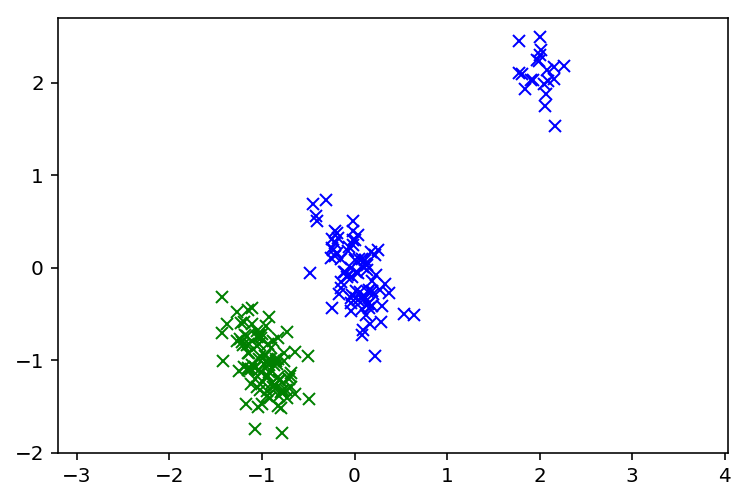

(200, 2)


In [3]:
NX1 = np.concatenate((x0, x1), axis=0, out=None)
NY1 = np.concatenate((y0, y1), axis=0, out=None)
N1 = np.array([[x, y] for x, y in zip(NX1, NY1)])
N2 = np.array([[x, y] for x, y in zip(x2, y2)])
plt.plot(N1[:, 0], N1[:, 1], 'x', color='blue')
plt.plot(N2[:, 0], N2[:, 1], 'x', color='green')
plt.axis('equal')
plt.show()
N1_N2 = np.concatenate((N1, N2), axis=0, out=None)
print(N1_N2.shape)
y_n = [ -1 if x<100 else 1 for x in range(0, 200) ]

In [4]:
df = pd.io.parsers.read_csv('iris.data', names=["sepal-length","sepal-width","petal-length","petal-width","classes"])
df.head()

,sepal-length,sepal-width,petal-length,petal-width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
values = df[["sepal-length","sepal-width","petal-length","petal-width"]].values
setosas, versicolors, virginicas = values[:50], values[50:100], values[100:]
setosas_T, versicolors_T, virginicas_T = setosas.T, versicolors.T, virginicas.T

In [7]:
setosa_mean = [np.mean(setosas_T[i], axis=0) for i in range(0,4)]
versicolor_mean = [np.mean(versicolors_T[i], axis=0) for i in range(0,4)]
virginica_mean = [np.mean(virginicas_T[i], axis=0) for i in range(0,4)]
mean_vectors = [setosa_mean, versicolor_mean, virginica_mean]
mean_vectors

[[5.006, 3.418, 1.464, 0.244],
 [5.936, 2.7700000000000005, 4.26, 1.3259999999999998],
 [6.587999999999998, 2.974, 5.5520000000000005, 2.0260000000000002]]

In [8]:
all_mean = (np.array(setosa_mean) + np.array(versicolor_mean) + np.array(virginica_mean))/3

In [181]:
S_B = np.zeros((4,4))
S_W = np.zeros((4,4))
setosa_sc_mat, versicolor_sc_mat, virginica_sc_mat = np.zeros((4,4)), np.zeros((4,4)), np.zeros((4,4))

In [10]:
for i in range(0,50):
    s_row = np.array([setosas_T[0][i], setosas_T[1][i], setosas_T[2][i], setosas_T[3][i]]).reshape(4,1)
    setosa_mean_rs = np.array(setosa_mean).reshape(4,1)
    setosa_sc_mat += (s_row-setosa_mean_rs).dot((s_row-setosa_mean_rs).T)
    ve_row = np.array([versicolors_T[0][i], versicolors_T[1][i], versicolors_T[2][i], versicolors_T[3][i]]).reshape(4,1)
    versicolor_mean_rs = np.array(versicolor_mean).reshape(4,1)
    versicolor_sc_mat += (ve_row-versicolor_mean_rs).dot((ve_row-versicolor_mean_rs).T)
    vi_row = np.array([virginicas_T[0][i], virginicas_T[1][i], virginicas_T[2][i], virginicas_T[3][i]]).reshape(4,1)
    virginica_mean_rs = np.array(virginica_mean).reshape(4,1)
    virginica_sc_mat += (vi_row-virginica_mean_rs).dot((vi_row-virginica_mean_rs).T)

S_W = setosa_sc_mat+versicolor_sc_mat+virginica_sc_mat

In [11]:
b_setosa = (setosa_mean-all_mean).reshape(4,1)
b_versicolor = (versicolor_mean-all_mean).reshape(4,1)
b_virginica = (virginica_mean-all_mean).reshape(4,1)
all_mean_rs = all_mean.reshape(4,1)
S_B_setosa = 50*(b_setosa).dot((b_setosa).T)
S_B_versicolor = 50*(b_versicolor).dot((b_versicolor).T)
S_B_virginica = 50*(b_virginica).dot((b_virginica).T)
S_B = (S_B_setosa+S_B_versicolor+S_B_virginica)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [12]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [13]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

In [14]:
X_lda = values.dot(W)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


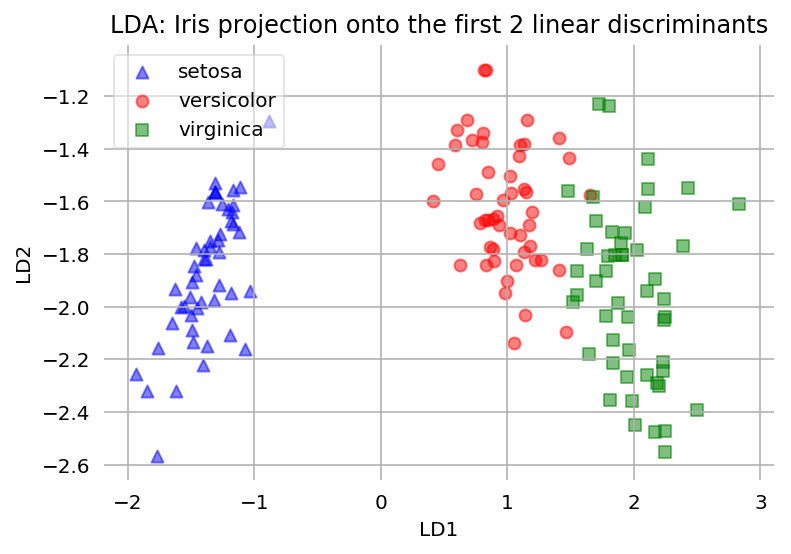

In [15]:
def plot_step_lda():

    ax = plt.subplot(111)

    plt.scatter(x=X_lda[:,0].real[:50],
        y=X_lda[:,1].real[:50],
        marker='^',
        color='blue',
        alpha=0.5,
        label='setosa'
    )
    plt.scatter(x=X_lda[:,0].real[50:100],
        y=X_lda[:,1].real[50:100],
        marker='o',
        color='red',
        alpha=0.5,
        label='versicolor'
    )
    plt.scatter(x=X_lda[:,0].real[100:150],
        y=X_lda[:,1].real[100:150],
        marker='s',
        color='green',
        alpha=0.5,
        label='virginica'
    )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [16]:
# Error Correction Learning Perceptron

In [183]:
X = df.iloc[50:150, [0,2]].values
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
learning_rate = 1
epoch = 50

In [184]:
W = np.zeros(1 + X.shape[1])
errors_arr = []

In [185]:
def net_input(X):
        return np.dot(X, W[1:]) + W[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [186]:
for e in range(epoch):
    errors = 0
    for xi, target in zip(X, y):
        update = learning_rate * (target - predict(xi))
        W[1:] +=  update * xi
        W[0] +=  update
        errors += int(update != 0.0)
    errors_arr.append(errors)

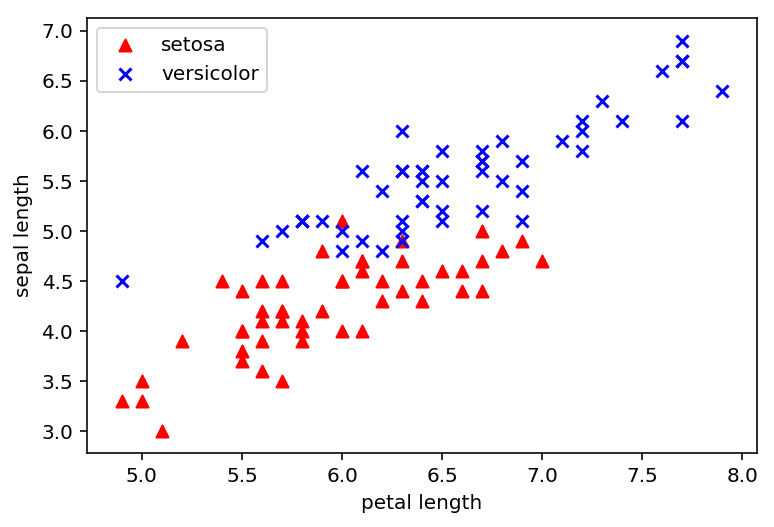

In [187]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='^', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [188]:
# IRLS

In [189]:
def IRLS(y, X, maxiter, w_init=1, tolerance=0.001):
    n, p = X.shape
    w = np.repeat(1, n)
    R = np.diag(w)
    z = np.linalg.inv(R).dot(y)
    H_inv = np.linalg.inv( np.dot(np.dot(X.T, R), X) )
    E = X.T.dot(R).dot(z)
    W = np.dot(H_inv, E)
    irls = []
    for _ in range(maxiter):
        W_old = W
        t = X.dot(W)
        R_sub = (t * (1 - t)).reshape(1, X.shape[0])
        R = np.diag(R_sub[0])
        z = X.dot(W) - np.linalg.inv(R).dot(t - y)
        H_inv = np.linalg.inv( np.dot(np.dot(X.T, R), X) )
        E = X.T.dot(R).dot(z)
        W = np.dot(H_inv, E)
        tol = sum(abs(W - W_old))
        if tol < tolerance:
            return W
    return W

irls_W = np.abs(IRLS(y_train, X_train, 20))
pred = np.dot(X_train, irls_W)
odds = np.exp(pred)
y_pred = np.round(odds / (1 + odds))
irls = X * irls_W

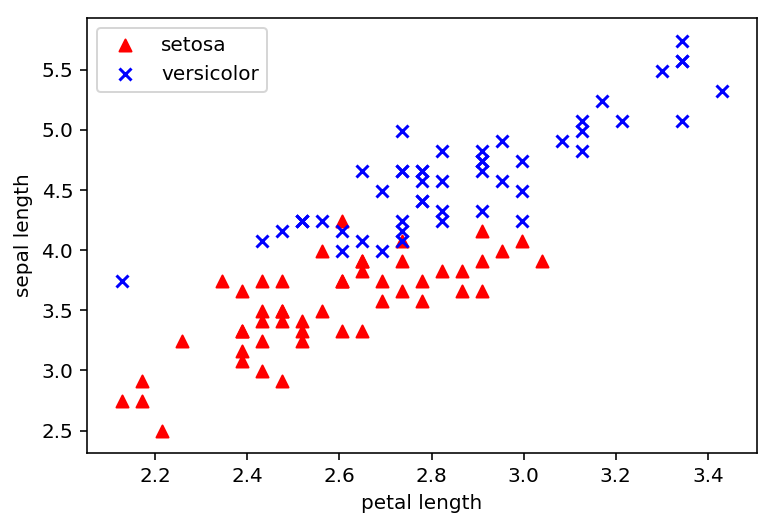

In [190]:
plt.scatter(irls[:50, 0], irls[:50, 1], color='red', marker='^', label='setosa')
plt.scatter(irls[50:100, 0], irls[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

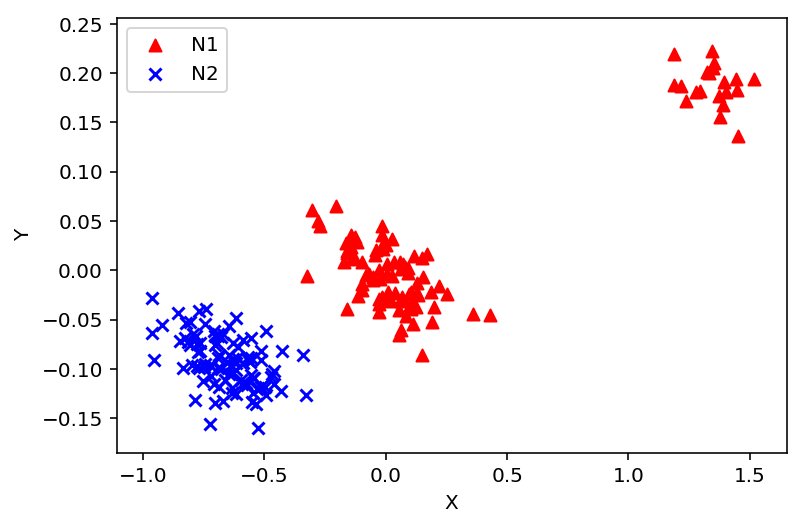

In [25]:
irls_W_G = np.abs(IRLS(y_n, N1_N2, 20))
irls_G = N1_N2 * irls_W_G
plt.scatter(irls_G[:100, 0], irls_G[:100, 1], color='red', marker='^', label='N1')
plt.scatter(irls_G[100:200, 0], irls_G[100:200, 1], color='blue', marker='x', label='N2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

In [26]:
for e in range(epoch):
    errors = 0
    for xi, target in zip(N1_N2, y_n):
        update = learning_rate * (target - predict(xi))
        W[1:] +=  update * xi
        W[0] +=  update
        errors += int(update != 0.0)
    errors_arr.append(errors)

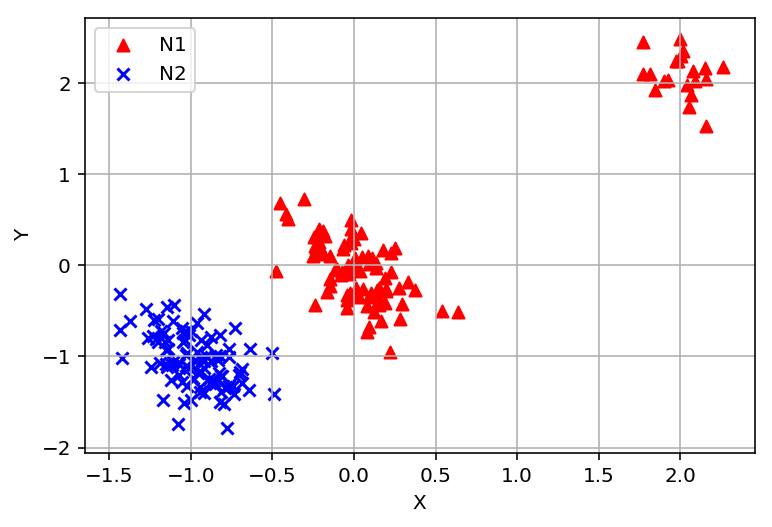

In [180]:
plt.scatter(N1_N2[:100, 0], N1_N2[:100, 1], color='red', marker='^', label='N1')
plt.scatter(N1_N2[100:200, 0], N1_N2[100:200, 1], color='blue', marker='x', label='N2')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [28]:
# N1,N2 FLDA

In [62]:
N1_mean = [np.mean(N1.T[i], axis=0) for i in range(0,2)]
N2_mean = [np.mean(N2.T[i], axis=0) for i in range(0,2)]
mean_N = [N1_mean, N2_mean]
all_mean_N = (np.array(N1_mean) + np.array(N2_mean))/2
S_B = np.zeros((2,2))
S_W = np.zeros((2,2))
N1_sc_mat, N2_sc_mat = np.zeros((2,2)), np.zeros((2,2))

for i in range(0,N1.shape[0]):
    N1_row = np.array([N1.T[0][i], N1.T[1][i]]).reshape(2,1)
    N1_mean_rs = np.array(N1_mean).reshape(2,1)
    N1_sc_mat += (N1_row-N1_mean_rs).dot((N1_row-N1_mean_rs).T)
    N2_row = np.array([N2.T[0][i], N2.T[1][i]]).reshape(2,1)
    N2_mean_rs = np.array(N2_mean).reshape(2,1)
    N2_sc_mat += (N2_row-N2_mean_rs).dot((N2_row-N2_mean_rs).T)

S_W_N = N1_sc_mat+N2_sc_mat
b_N1 = (N1_mean-all_mean_N).reshape(2,1)
b_N2 = (N2_mean-all_mean_N).reshape(2,1)
all_mean_rs_N = all_mean_N.reshape(2,1)
S_B_N1 = 100*(b_N1).dot((b_N1).T)
S_B_N2 = 100*(b_N2).dot((b_N2).T)
S_B_N = (S_B_N1+S_B_N2)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W_N).dot(S_B_N))
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
W_N = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
X_lda = N1_N2.dot(W_N)
np.where(self.net_input(X) >= 0.0, 1, -1)

array([[ 0.9699909 , -0.70770664],
       [ 0.24314121,  0.70650641]])

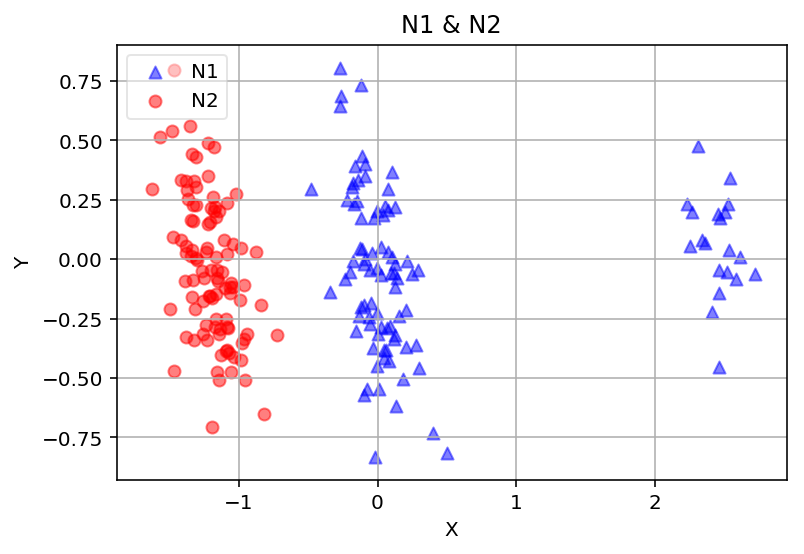

In [30]:
def plot_step_lda():

    ax = plt.subplot(111)

    plt.scatter(x=X_lda[:,0].real[:100],
        y=X_lda[:,1].real[:100],
        marker='^',
        color='blue',
        alpha=0.5,
        label='N1'
    )
    plt.scatter(x=X_lda[:,0].real[100:200],
        y=X_lda[:,1].real[100:200],
        marker='o',
        color='red',
        alpha=0.5,
        label='N2'
    )

    plt.xlabel('X')
    plt.ylabel('Y')

    leg = plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('N1 & N2')

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [78]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [192]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-0.4  -0.68  1.82]


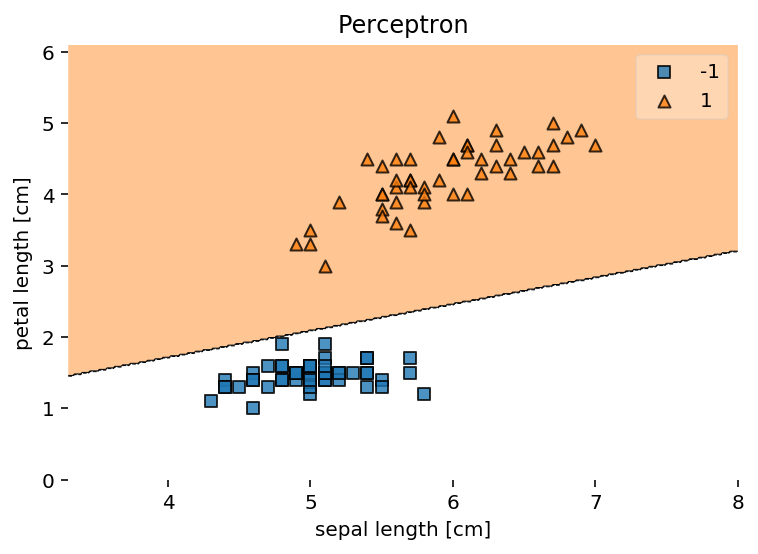

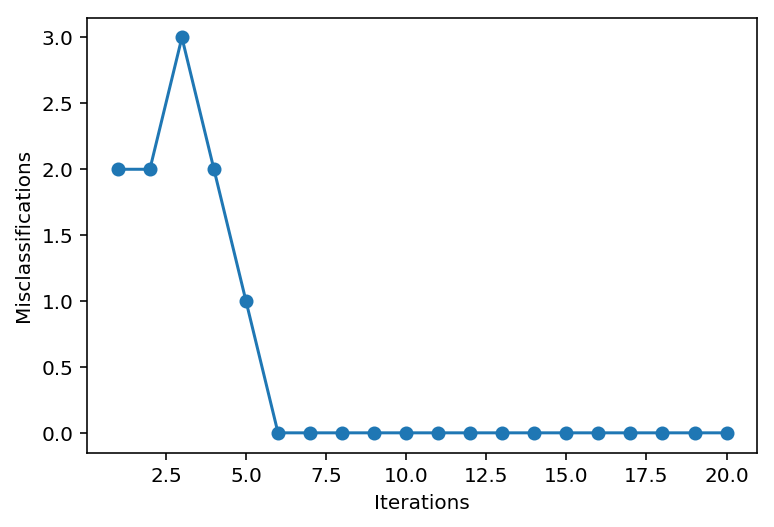

In [193]:
ppn = Perceptron(epochs=20, eta=0.1)
print(ppn)
ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [194]:
def IRLS(y, X, maxiter, w_init=1, tolerance=0.001):
    n, p = X.shape
    w = np.repeat(1, n)
    R = np.diag(w)
    z = np.linalg.inv(R).dot(y)
    H_inv = np.linalg.inv( np.dot(np.dot(X.T, R), X) )
    E = X.T.dot(R).dot(z)
    W = np.dot(H_inv, E)
    irls = []
    for _ in range(maxiter):
        W_old = W
        t = X.dot(W)
        R_sub = (t * (1 - t)).reshape(1, X.shape[0])
        R = np.diag(R_sub[0])
        z = X.dot(W) - np.linalg.inv(R).dot(t - y)
        H_inv = np.linalg.inv( np.dot(np.dot(X.T, R), X) )
        E = X.T.dot(R).dot(z)
        W = np.dot(H_inv, E)
        tol = sum(abs(W - W_old))
        if tol < tolerance:
            return W
    return W

irls_W = IRLS(y_train, X_train, 50)
np.dot(X_train, irls_W)
irls = X * irls_W

In [197]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv(url, names=names)
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test) 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
